# Deep Neural Networks

Let's use multiple hidden layers.

In [1]:
import numpy as np
import pandas as pd 
import sys, os
import matplotlib.pyplot as plt

# Add the project root to sys.path (one level up from this notebook)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from hypotai.data import generate_triangle_data
from hypotai.plotting import plot_triangle


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neural_network import MLPRegressor

In [2]:
deep_mlp = MLPRegressor(
    hidden_layer_sizes=(64, 64, 32, 16, 8),  # 5 hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    verbose=True
)

In [5]:
df = generate_triangle_data(n_samples=10_000, angle_mode="random")
X = df[["a", "b", "angle_deg"]]
y = df["c"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
deep_mlp.fit(X_train, y_train)

Iteration 1, loss = 959.77538665
Iteration 2, loss = 160.89847783
Iteration 3, loss = 57.60050096
Iteration 4, loss = 32.99141464
Iteration 5, loss = 29.77503139
Iteration 6, loss = 28.21694726
Iteration 7, loss = 27.23162381
Iteration 8, loss = 26.28088701
Iteration 9, loss = 25.47288019
Iteration 10, loss = 24.91535972
Iteration 11, loss = 24.07866071
Iteration 12, loss = 23.24248287
Iteration 13, loss = 22.55425969
Iteration 14, loss = 21.54195631
Iteration 15, loss = 20.60505713
Iteration 16, loss = 19.28769818
Iteration 17, loss = 17.48157908
Iteration 18, loss = 15.92067351
Iteration 19, loss = 14.29149296
Iteration 20, loss = 13.11338354
Iteration 21, loss = 11.12132439
Iteration 22, loss = 9.98606185
Iteration 23, loss = 10.06212570
Iteration 24, loss = 8.40609369
Iteration 25, loss = 7.69257863
Iteration 26, loss = 5.75054651
Iteration 27, loss = 5.11063250
Iteration 28, loss = 4.90937125
Iteration 29, loss = 4.22764888
Iteration 30, loss = 3.69468164
Iteration 31, loss = 2.94

,loss,'squared_error'
,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True


In [7]:
deep_mlp

,loss,'squared_error'
,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True


Mean Squared Error: 2.0337301686530895
R^2 Score: 0.9985672652768868


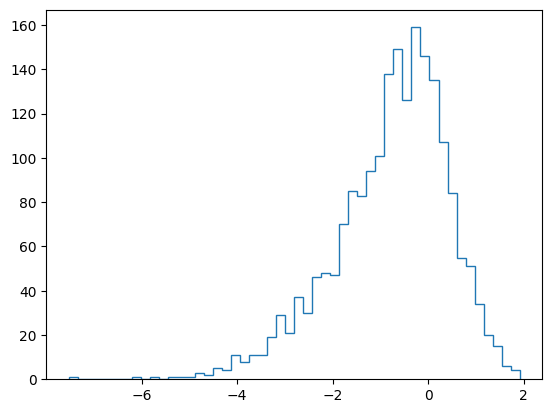

In [11]:
y_predict = deep_mlp.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_predict))
print("R^2 Score:", r2_score(y_test, y_predict))
plt.hist(y_test-y_predict, bins=50, histtype='step', label='Residuals');

Okay. So it looks good, a very high R2 score and a low MSE. There are several things going on that we should address. Like, what is a learning rate? What is beta? Did it overfit, underfit? Or just the right fit? Could it have been better? 

Let's start with the "epochs" and the evolution of the training performance in time.<br>
Each time you pass the training set through all the layers it is called 1 epoch. At the end of each epoch the **weights** and **biases** are updated. 

For this update you compute a **loss function** which is usually the MSE. Then you use an *optimizer* that minimizes this loss. Here it is an *adaptive loss function* i.e. "adam". This bascially does a **BACK-PROPAGATION** and calculates which weights contributed the most to the loss. Then it creates a inverse gradient descent i.e. finds the quickest way to bring the loss closer to zero. 

 - Forward pass: Compute predictions to true values using the current weights.
 - Loss computation: Compare predictions to the true y using a loss function (e.g., MSE).
 - Backward pass (backpropagation): Compute how much each weight contributed to the error.
 - Optimizer step: Use those derivatives to adjust weights to reduce the loss in the next round.

If the loss function ($L$) is the MSE like this;
$$L = \frac{1}{n}\sum(y_i - \hat{y_i})^2$$
and you predictions are a function of your inputs and the weights $\hat{y_i}=f(x_i;W)$ then you can optimize this $L(W)$ by playing with the weights. <br>

The standard way is the **Gradient Descent** 

$$ W-\eta * \frac{\partial L}{\partial W} $$
where the $\eta$ is called **learning rate** i.e. how fast/slow you want that change to be. If it is large you might be looking at the effects of changing the weight with large steps thus might miss the optimized value or it takes too much time. But if it is too low, then you scan the surface too slowly. 

The optimizers like "adam" does this in a sophisticated way. 

## Step up. Let's write our own 1 layer, 1 neuron network

Then we look at all the weights and do the backpropagation ourselves.

In [13]:
# Initial parameters
x = 2.0
y_true = 2.0

# Weights and biases
w1, b1 = 0.5, 0.0
w2, b2 = 1.0, 0.0

# Learning rate
eta = 0.1

In [14]:
# Forward pass in our simple neural network
z1 = x * w1 + b1   # Linear transformation, neuron 1 
a1 = max(0, z1)    # Activation; ReLU
z2 = a1 * w2 + b2  # Linear transformation, neuron 2 (output layer)
y_pred = z2

In [15]:
# Compute loss (MSE)
loss = 0.5 * (y_pred - y_true) ** 2

In [16]:
# Backward pass
dL_dypred = y_pred - y_true  # ∂L/∂ŷ

In [ ]:
# Gradients
dL_dw2 = dL_dypred * a1
dL_db2 = dL_dypred
dL_da1 = dL_dypred * w2
dL_dz1 = dL_da1 * (1 if z1 > 0 else 0)  # ReLU
dL_dw1 = dL_dz1 * x
dL_db1 = dL_dz1

# Update weights and biases
w2 -= eta * dL_dw2
b2 -= eta * dL_db2
w1 -= eta * dL_dw1
b1 -= eta * dL_db1

In [22]:
# Display updated parameters and gradients
results = pd.DataFrame({
    "Parameter": ["w1", "b1", "w2", "b2", "loss_before"],
    "Old Value": [0.5, 0.0, 1.0, 0.0, 0.5],
    "Gradient": [dL_dw1, dL_db1, dL_dw2, dL_db2, None],
    "New Value": [w1, b1, w2, b2, None]
})
results

,Parameter,Old Value,Gradient,New Value
0,w1,0.5,-2.2,0.92
1,b1,0.0,-1.1,0.21
2,w2,1.0,-1.0,1.20
3,b2,0.0,-1.0,0.20
4,loss_before,0.5,NaN,NaN


So we started it with some initial weights and biases, passed it through 1 layer and based on what we predicted, we calculated a loss. Then we find the steepest change (`dL_dypred * XYZ`) and move in the inverse direction for eta-much (`XYZ -= eta * gradient`) for each of the parameters i.e. weights and biases. Now you have new ones, that give you a better loss compared to before. <br>
Do this for many neurons for many layers then you have yourself a fully connected network! 

Before we move on, a few last comments: <br>
Fully connected layers (also called dense layers) connect every neuron from one layer to every neuron in the next. These are simple and powerful, and are commonly used for tabular data or as final layers in networks. However, they have a lot of parameters and don't take advantage of structure in data like images or sequences.

Not fully connected layers use a more selective connection strategy:
- Convolutional layers (CNNs) connect each neuron only to a small patch of the input (like a sliding window). This works great for images, where local patterns like edges are important.
- Recurrent layers (RNNs, LSTMs) connect data across time, so each step depends only on the current input and the previous one — useful for sequences and time series.
- Transformer layers don’t connect everything directly, but instead use an attention mechanism to focus on the most relevant parts of the input.

But since we are aiming for inefficiency. Let's use CNN's to compute the hypotenus or the long side of triangles!